<a href="https://colab.research.google.com/github/pimentad2020/DSWP/blob/master/Demonstracao_PyCaret_Churn_Kaggle%20OK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Demonstração PyCaret

## Análise supervisionada com PyCaret no desafio do LABDATA da Fundação Instituto de Administração (FIA)

Realizaremos uma demonstração de aprendizagem supervisionada utilizando [PyCaret](https://pycaret.org/), uma biblioteca open source criada pelo cientista de dados e consultor da PwC Moez Ali. A biblioteca foi criada para facilitar a utilização de algoritmos de machine learning, podendo ser classificada como uma ferramenta da AutoML.

Para essa demonstração utilizaremos o [desafio no Kaggle](https://www.kaggle.com/c/labdata-churn-challenge-2020/data) proposto pela Fundação Instituto de Administração (FIA) para realizar a predição de quais clientes poderiam deixar uma certa companhia telefônica (churn). O colega Mário Monnerat trouxe o desafio para o treinamento de Big Data da Sufis, realizado em outubro e novembro de 2020, o que se mostrou uma ferramenta essencial para consolidar os conceitos de análise supervisionada.


Além da PyCaret utilizaremos as bibliotecas pandas, numpy

## Base de Churn

A base utilizada possui informações de cada cliente de uma companhia telefônica. Nosso intuito é prever se o cliente permanecerá contratando os serviços da empresa ou se vai sair (churn). Para tal, nos é fornecida a base de treino, que possui as informações de churn e a base de testes, que não possui e será utilizada para a previsão final.

Como sabemos, devemos utilizar somente a base de treino para tomar decisões com relação a qual o melhor modelo. Desse modo, devemos ter atenção e nos valer de ferramentas como validação cruzada (cross validation) e evitar o vazamento de dados do teste para o treino. O PyCaret utiliza validação cruzada sempre que possível.

## Pergunta a ser respondida

Conforme prega o CRISP-DM, antes de iniciarmos qualquer modelo de machine learning, devemos nos questionar sobre qual problema queremos solucionar. Nos desafios do Kaggle isso resta facilitado, tendo em vista que já temos o problema para ser solucionado, mas o mesmo não ocorre na vida real. Sugere-se seguir os passos do CRISP-DM, com bastante atenção para a primeira fase, para que o trabalho tenha um norte bem definido. 

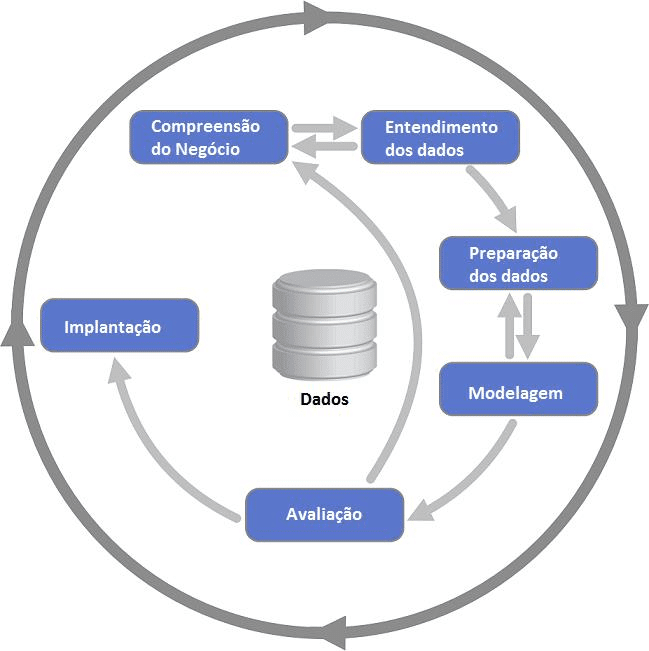

In [6]:
from IPython.display import Image
Image(filename='/content/sample_data/crisp.png') 
# Image(filename='./img/crisp.png') #
# Image(filename='C:/Users/hmdbr/Desktop/PyCaret_Churn/img/crisp.png')

In [7]:
# instalar o PyCaret
!pip install pycaret

     |████████████████████████████████| 256kB 14.7MB/s 
     |████████████████████████████████| 14.2MB 332kB/s 
     |████████████████████████████████| 6.8MB 25.6MB/s 
     |████████████████████████████████| 157.5MB 93kB/s 
     |████████████████████████████████| 102kB 14.5MB/s 
     |████████████████████████████████| 1.6MB 42.7MB/s 
     |████████████████████████████████| 245kB 60.0MB/s 
     |████████████████████████████████| 174kB 51.2MB/s 
     |████████████████████████████████| 1.8MB 45.7MB/s 
     |████████████████████████████████| 276kB 64.4MB/s 
     |████████████████████████████████| 65.8MB 67kB/s 
     |████████████████████████████████| 81kB 13.8MB/s 
     |████████████████████████████████| 163kB 64.3MB/s 
     |████████████████████████████████| 348kB 64.3MB/s 
     |████████████████████████████████| 1.1MB 51.8MB/s 
     |████████████████████████████████| 61kB 10.9MB/s 
     |████████████████████████████████| 153kB 57.8MB/s 
     |████████████████████████████████| 2.1MB 46.9M

In [8]:
import pandas as pd
import numpy as np
from pycaret.classification import *


In [9]:
# Carregar dados de treinamento e de teste
train_df = pd.read_csv('/content/sample_data/train.csv')
test_df = pd.read_csv('/content/sample_data/test.csv')

In [10]:
display(train_df.head())
display(test_df.head())

,id,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,4030,Female,0,No,No,56.0,No,No phone service,DSL,Yes,Yes,Yes,Yes,No,No,Two year,No,NaN,45.05,2560.1,0
1,6731,Male,0,Yes,Yes,NaN,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,19.65,332.65,0
2,6479,Female,0,Yes,No,60.0,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),110.80,6640.7,0
3,6861,Female,0,No,No,37.0,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),101.90,3545.35,1
4,3266,Male,0,Yes,Yes,29.0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.75,1974.8,1


,id,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,5027,Male,0,Yes,Yes,23.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Credit card (automatic),20.00,445.3
1,1733,Male,1,Yes,Yes,61.0,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,One year,No,NaN,99.00,5969.3
2,5384,Male,0,No,No,36.0,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,84.75,3050.15
3,6554,Female,0,Yes,Yes,61.0,No,No phone service,DSL,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),61.45,3751.15
4,364,Female,0,No,No,47.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,20.55,945.7


In [11]:
# Setar id como indice dos dataframes
train_df.set_index('id', inplace=True)
test_df.set_index('id', inplace=True)

In [12]:
display(train_df.head())
display(test_df.head())

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
id,,,,,,,,,,,,,,,,,,,,
4030,Female,0,No,No,56.0,No,No phone service,DSL,Yes,Yes,Yes,Yes,No,No,Two year,No,NaN,45.05,2560.1,0
6731,Male,0,Yes,Yes,NaN,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,19.65,332.65,0
6479,Female,0,Yes,No,60.0,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),110.80,6640.7,0
6861,Female,0,No,No,37.0,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),101.90,3545.35,1
3266,Male,0,Yes,Yes,29.0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.75,1974.8,1


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
id,,,,,,,,,,,,,,,,,,,
5027,Male,0,Yes,Yes,23.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Credit card (automatic),20.00,445.3
1733,Male,1,Yes,Yes,61.0,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,One year,No,NaN,99.00,5969.3
5384,Male,0,No,No,36.0,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,84.75,3050.15
6554,Female,0,Yes,Yes,61.0,No,No phone service,DSL,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),61.45,3751.15
364,Female,0,No,No,47.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,20.55,945.7


In [13]:
# Verificando os tipos
train_df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure              float64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                 int64
dtype: object

In [14]:
# Verificando missing data
train_df.isnull().sum()

gender                0
SeniorCitizen         0
Partner               0
Dependents          218
tenure              461
PhoneService          0
MultipleLines         0
InternetService       0
OnlineSecurity        0
OnlineBackup          0
DeviceProtection      0
TechSupport           0
StreamingTV           0
StreamingMovies       0
Contract              0
PaperlessBilling      0
PaymentMethod        99
MonthlyCharges        0
TotalCharges          0
Churn                 0
dtype: int64

In [15]:
# TotalChanges não é numerico, transformar
train_df['TotalCharges'] = pd.to_numeric(train_df['TotalCharges'], errors='coerce')
test_df['TotalCharges'] = pd.to_numeric(test_df['TotalCharges'], errors='coerce')



In [16]:
# Feature engineering
train_df.loc[train_df['TotalCharges'].isnull(), 'TotalCharges'] = train_df.loc[train_df['TotalCharges'].isnull(), 'MonthlyCharges'] * train_df.loc[train_df['TotalCharges'].isnull(), 'tenure']
test_df.loc[test_df['TotalCharges'].isnull(), 'TotalCharges'] = test_df.loc[test_df['TotalCharges'].isnull(), 'MonthlyCharges'] * test_df.loc[test_df['TotalCharges'].isnull(), 'tenure']

In [17]:
# Feature engineering + tratamento missing data
train_df['tenure'] = train_df['TotalCharges'] / train_df['MonthlyCharges']
test_df['tenure'] = test_df['TotalCharges'] /  test_df['MonthlyCharges']

In [18]:
train_df.loc[train_df['Dependents'].isnull(), 'Dependents'] = train_df.loc[train_df['Dependents'].isnull(), 'MultipleLines']
test_df.loc[test_df['Dependents'].isnull(), 'Dependents'] = test_df.loc[test_df['Dependents'].isnull(), 'MultipleLines']

In [19]:
train_df.loc[train_df['Dependents'] == 'No phone service', 'Dependents'] = 'No'
test_df.loc[test_df['Dependents'] == 'No phone service', 'Dependents'] = 'No'

In [20]:
display(train_df.head())
display(test_df.head())

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
id,,,,,,,,,,,,,,,,,,,,
4030,Female,0,No,No,56.827969,No,No phone service,DSL,Yes,Yes,Yes,Yes,No,No,Two year,No,NaN,45.05,2560.10,0
6731,Male,0,Yes,Yes,16.928753,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,19.65,332.65,0
6479,Female,0,Yes,No,59.934116,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),110.80,6640.70,0
6861,Female,0,No,No,34.792444,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),101.90,3545.35,1
3266,Male,0,Yes,Yes,27.912367,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.75,1974.80,1


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
id,,,,,,,,,,,,,,,,,,,
5027,Male,0,Yes,Yes,22.265000,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Credit card (automatic),20.00,445.30
1733,Male,1,Yes,Yes,60.295960,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,One year,No,NaN,99.00,5969.30
5384,Male,0,No,No,35.989971,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,84.75,3050.15
6554,Female,0,Yes,Yes,61.043938,No,No phone service,DSL,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),61.45,3751.15
364,Female,0,No,No,46.019465,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,20.55,945.70


## A função setup permite muitas customizações para treinamento dos modelos

A função setup permite customizar (dentre outros):
- tratamento de missing data simples e com algoritmos
- over e undersampling
- principal component analysis (PCA)
- variaveis polinomiais
- razão entre variáveis
- % de treino e validação
- tratamento de colinearidade
- normalização

In [21]:
# Função principal! Todas as configurações para treinamento dos modelos se dá no setup.

clf1 = setup(train_df, target = 'Churn', session_id=123, experiment_name='teste_1', feature_ratio=True, )

,Description,Value
0,session_id,123
1,Target,Churn
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(5634, 20)"
5,Missing Values,True
6,Numeric Features,3
7,Categorical Features,16
8,Ordinal Features,False
9,High Cardinality Features,False


## Função que compara vários modelos de uma só vez, com várias métricas

One Function to rule them all, One Function to find them, One Function to bring them all, and in the darkness of jupyter notebook's theme bind them

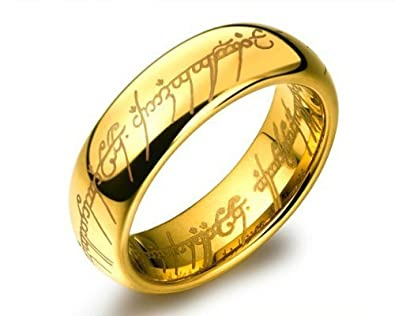

In [23]:
Image(filename='/content/sample_data/ring.jpg') 

In [24]:
# Testa 15 modelos de uma vez
best_model = compare_models(exclude=['catboost'])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lda,Linear Discriminant Analysis,0.8177,0.8601,0.5717,0.6845,0.6216,0.5028,0.5074,0.031
lr,Logistic Regression,0.8151,0.8635,0.5639,0.6788,0.6141,0.4942,0.4991,0.378
ridge,Ridge Classifier,0.8116,0.0000,0.5077,0.6936,0.5846,0.4667,0.4772,0.018
gbc,Gradient Boosting Classifier,0.8113,0.8605,0.5630,0.6677,0.6094,0.4864,0.4904,0.688
ada,Ada Boost Classifier,0.8062,0.8558,0.5649,0.6519,0.6041,0.4769,0.4798,0.228
lightgbm,Light Gradient Boosting Machine,0.8060,0.8488,0.5640,0.6516,0.6035,0.4761,0.4790,0.125
rf,Random Forest Classifier,0.8032,0.8402,0.5223,0.6570,0.5797,0.4539,0.4603,0.700
xgboost,Extreme Gradient Boosting,0.8007,0.8396,0.5503,0.6387,0.5903,0.4597,0.4625,3.352
et,Extra Trees Classifier,0.7953,0.8214,0.5290,0.6311,0.5740,0.4410,0.4449,0.636
knn,K Neighbors Classifier,0.7682,0.7604,0.4487,0.5732,0.5021,0.3544,0.3595,0.131


In [25]:
# Criando os melhores modelos de acordo com acurácia
modelo_lr = create_model('lr')
modelo_gbc = create_model('gbc')
modelo_ada = create_model('ada')
modelo_lightgbm = create_model('lightgbm')
#modelo_catboost = create_model('catboost')
modelo_ridge = create_model('ridge')
modelo_lda = create_model('lda')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8051,0.8701,0.5922,0.6354,0.6131,0.4830,0.4835
1,0.8380,0.8749,0.6058,0.7326,0.6632,0.5577,0.5621
2,0.8076,0.8549,0.5769,0.6522,0.6122,0.4849,0.4865
3,0.8249,0.8616,0.5437,0.7179,0.6188,0.5079,0.5162
4,0.7919,0.8597,0.5534,0.6129,0.5816,0.4436,0.4446
5,0.8274,0.8701,0.6019,0.6966,0.6458,0.5325,0.5350
6,0.8299,0.8488,0.5437,0.7368,0.6257,0.5189,0.5289
7,0.8122,0.8429,0.5534,0.6706,0.6064,0.4845,0.4884
8,0.8325,0.8546,0.5340,0.7534,0.6250,0.5212,0.5340
9,0.8071,0.8636,0.6117,0.6364,0.6238,0.4941,0.4943


In [26]:
# Tunar os hiperparametros (pode demorar mais, pode tentar só com o create_model)
tuned_lr = tune_model(modelo_lr)
tuned_gbc = tune_model(modelo_gbc)
tuned_ada = tune_model(modelo_ada)
tuned_lightgbm = tune_model(modelo_lightgbm)
#tuned_catboost = tune_model(modelo_catboost)
tuned_ridge = tune_model(modelo_ridge)
tuned_lda = tune_model(modelo_lda)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8076,0.8729,0.5922,0.6421,0.6162,0.4881,0.4888
1,0.8354,0.8741,0.5962,0.7294,0.6561,0.5494,0.5542
2,0.8101,0.8547,0.5865,0.6559,0.6193,0.4933,0.4947
3,0.8198,0.8631,0.5340,0.7051,0.6077,0.4936,0.5017
4,0.7919,0.8594,0.5340,0.6180,0.5729,0.4363,0.4383
5,0.8299,0.8694,0.6117,0.7000,0.6528,0.5409,0.5431
6,0.8198,0.8478,0.5146,0.7162,0.5989,0.4867,0.4977
7,0.8071,0.8420,0.5437,0.6588,0.5957,0.4706,0.4743
8,0.8350,0.8535,0.5437,0.7568,0.6328,0.5300,0.5421
9,0.8096,0.8625,0.6311,0.6373,0.6341,0.5055,0.5055


In [27]:
# Finaliza os modelos, ou seja, com os melhores hiperparametros, treinar na base de treino completa
f_lr = finalize_model(tuned_lr)
f_gbc = finalize_model(tuned_gbc)
f_ada = finalize_model(tuned_ada)
f_lightgbm = finalize_model(tuned_lightgbm)
#f_catboost = finalize_model(tuned_catboost)
f_ridge = finalize_model(tuned_ridge)
f_lda = finalize_model(tuned_lda)

## Criação de ensembles

Combinação de modelos pode ser útil para melhoria e generalização do modelo. O PyCaret permite ensemble com blending e stacking. Blending é uma espécie de votação e stacking utiliza as predições de um modelo para servir de variáveis explanatórias para o próximo. Uma grande vantagem de ensembles é que pode tornar o modelo mais robusto, com predições de diferentes tipos de algoritmos. Sugere-se utilizar algoritmos com abordagens bem diferentes (ex: redes neurais, algoritmos de árvore e algoritmos lineares).

No exemplo vamos utilizar um blending com votação "hard", ou seja, utiliza cada predição como 0 ou 1 na votação. O método "soft" utiliza as probabilidades de saída de cada modelo, o que pode melhorar o tuning do modelo final.


In [28]:
# Votacao com os 6 modelos
blender_hard = blend_models(estimator_list = [f_lightgbm,
                                                f_ada,
                                                f_lr,
                                                f_gbc,
                                              f_ridge,
                                              f_lda,
                                              # f_catboost
                                             #   tuned_gbc,
                                             #   tuned_catboost
                                             ], method = 'hard')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8203,0.0,0.6019,0.6739,0.6359,0.5171,0.5185
1,0.8329,0.0,0.5673,0.7375,0.6413,0.5348,0.5426
2,0.8127,0.0,0.5481,0.6786,0.6064,0.4853,0.4900
3,0.8223,0.0,0.5146,0.7260,0.6023,0.4921,0.5042
4,0.7995,0.0,0.5243,0.6429,0.5775,0.4479,0.4519
5,0.8299,0.0,0.5922,0.7093,0.6455,0.5348,0.5386
6,0.8325,0.0,0.5146,0.7681,0.6163,0.5144,0.5313
7,0.8147,0.0,0.5243,0.6923,0.5967,0.4794,0.4872
8,0.8249,0.0,0.5340,0.7237,0.6145,0.5045,0.5143
9,0.8020,0.0,0.5631,0.6374,0.5979,0.4673,0.4689


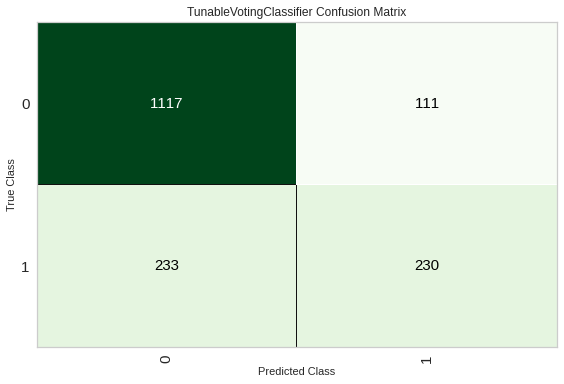

In [29]:
# mostrando a matriz de confusao
plot_model(blender_hard, plot = 'confusion_matrix')

In [30]:
# finaliza o modelo: treina com a base de treino inteira
f_blender_hard = finalize_model(blender_hard)

In [31]:
# realiza as predições (duas colunas: score e label)
predictions = predict_model(f_blender_hard, data = test_df)
predictions

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Label
id,,,,,,,,,,,,,,,,,,,,
5027,Male,0,Yes,Yes,22.265000,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Credit card (automatic),20.00,445.30,0
1733,Male,1,Yes,Yes,60.295960,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,One year,No,NaN,99.00,5969.30,0
5384,Male,0,No,No,35.989971,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,84.75,3050.15,0
6554,Female,0,Yes,Yes,61.043938,No,No phone service,DSL,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),61.45,3751.15,0
364,Female,0,No,No,46.019465,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,20.55,945.70,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4897,Male,0,No,No,23.496982,Yes,No,DSL,No,No,Yes,No,No,No,Month-to-month,Yes,Mailed check,49.70,1167.80,0
6940,Male,0,No,No,36.449552,Yes,No,Fiber optic,Yes,No,No,Yes,No,Yes,One year,Yes,Electronic check,89.20,3251.30,0
804,Female,0,Yes,No,46.876947,Yes,No,DSL,No,Yes,No,Yes,Yes,No,Two year,Yes,Credit card (automatic),64.20,3009.50,0


In [32]:
# Busca os labels (0 e 1). 
# Pode-se fazer alguma analise do melhor ponto de corte do Score, pois o label pega 0,5 pra cima como 1
pred_values = predictions['Label']
pred_values

id
5027    0
1733    0
5384    0
6554    0
364     0
       ..
4897    0
6940    0
804     0
1143    1
5773    0
Name: Label, Length: 1409, dtype: int64

In [33]:
ids = test_df.index
output = pd.DataFrame({'id': ids, 'Churn': pred_values})
output.to_csv("submission.csv", index=False)